# ggplot2 

1. 플롯의 세가지 주요 구성 요소를 배운다
2. 플롯에 변수를 추가하는 방법
3. `facet`을 사용하는 방법
4. 서로다른 모양으로 플롯을 그리는 다양한 기하 객체
5. 축을 수정하는 방법
6. 플랏을 저장하는 방법


In [1]:
library(tidyverse)
library(ggplot2)
# mpg 데이터셋은 R에 포함되어 있다.
data(package = "ggplot2")
# View(mpg) not yet supported in the Jupyter R kernel")

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --
v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.2     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Package,Item,Title
<chr>,<chr>,<chr>
ggplot2,diamonds,"Prices of over 50,000 round cut diamonds"
ggplot2,economics,US economic time series
ggplot2,economics_long,US economic time series
ggplot2,faithfuld,2d density estimate of Old Faithful data
ggplot2,luv_colours,'colors()' in Luv space
ggplot2,midwest,Midwest demographics
ggplot2,mpg,Fuel economy data from 1999 to 2008 for 38 popular models of cars
ggplot2,msleep,An updated and expanded version of the mammals sleep dataset
ggplot2,presidential,Terms of 11 presidents from Eisenhower to Obama


In [2]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [3]:
tail(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize
volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


In [4]:
dim(mpg)

[1] 234  11

In [5]:
names(mpg)

[1] "manufacturer" "model"        "displ"        "year"         "cyl"         
 [6] "trans"        "drv"          "cty"          "hwy"          "fl"          
[11] "class"

`cty` 는 도심 주행시 연비(갤런당 마일) 값이다.
`hwy`는 고속도로 주행시의 연비(갤런당 마일) 값이다.
`displ` 배기량을 리터 단위로 표시한 것 이다.
`drv`는 전륜(f), 후륜(r), 4륜(4)로 구별한 것이다.
`model`은 자동차 모델을 나타낸 것이며 총 38가지이다.
`class`는 자동차가 2인승, SUV, 중형차등을 분류한 것이다.

한국에서 사용되는 L당 km로 변경해보자.
1 갤런당 마일은 0.425 리터당 킬로미터 임으로

In [6]:
mpg_km <- mpg %>%
  mutate(cty_kml = cty * 0.425,
         hwy_kml = hwy * 0.425)
# mpg_km %>% select(cty:hwy_kml)
head(mpg_km)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cty_kml,hwy_kml
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,7.650,12.325
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8.925,12.325
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,8.500,13.175
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,8.925,12.750
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,6.800,11.050
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,7.650,11.050


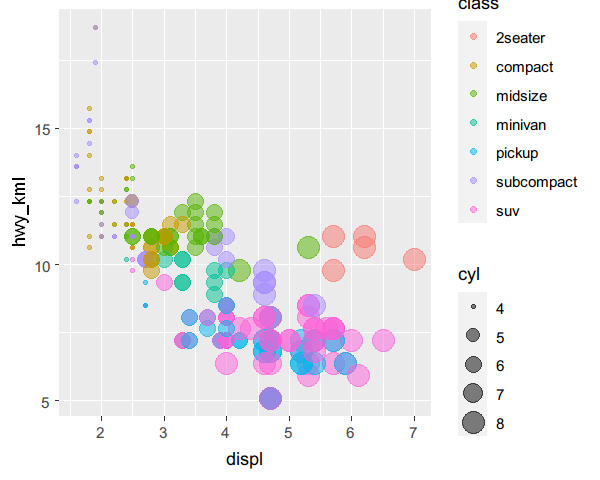

In [7]:
library(repr)
options(repr.plot.width=5, repr.plot.height=4)
ggplot(mpg_km, aes(x=displ, y=hwy_kml, color=class, size=cyl)) + geom_point(alpha=0.5)

위 그림을 통해 배기량이 클수록 연비가 안 좋아진다는 것을 직관적으로 파악할 수 있다. 그리고 `class`가 `2seater`인 자동차들은 배기량이 큼에도 불구하고 연비가 좋다는 것을 알 수 있다.


`mpg` 데이터셋에서 가장 많은 모델이 포함되어 있는 자동차 제조사는 어디인가?


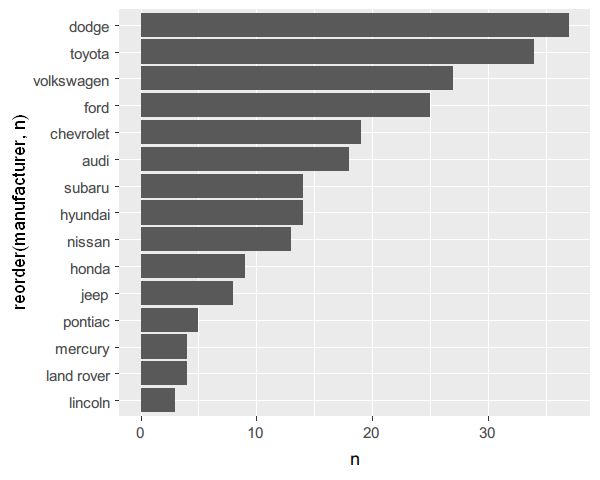

In [8]:
mostmodel <- mpg %>% group_by(manufacturer) %>% summarise(n = n()) %>% arrange(desc(n))

ggplot(mostmodel, aes(x=n, y=reorder(manufacturer, n))) + geom_bar(stat='identity')

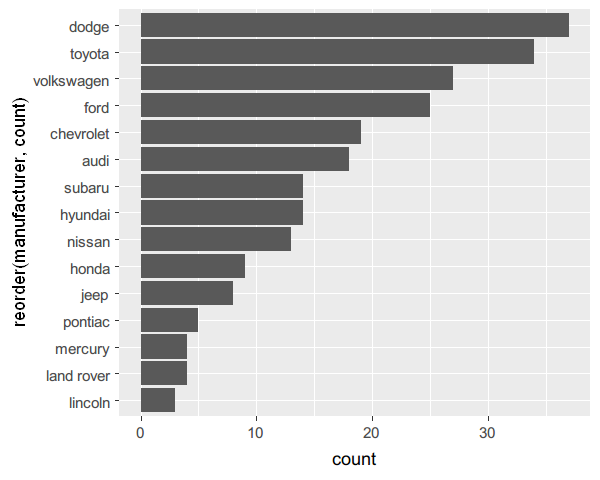

In [9]:
mpg %>% group_by(manufacturer) %>%
    summarise(count = n()) %>%
    ggplot(aes(x = reorder(manufacturer, count), y = count)) + 
        geom_bar(stat = 'identity') + coord_flip()

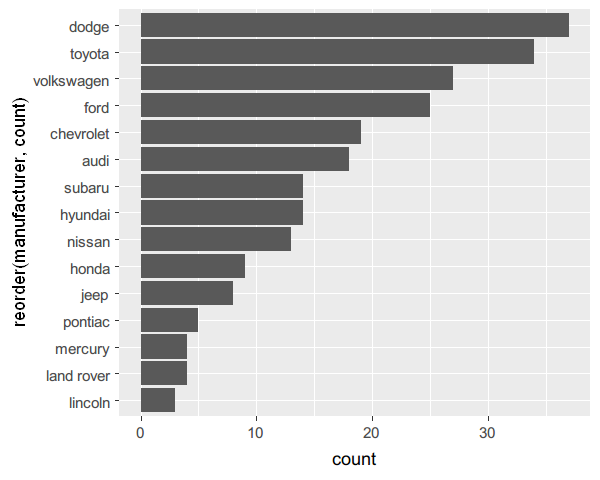

In [10]:
mpg %>% group_by(manufacturer) %>%
    summarise(count = n()) %>%
    ggplot(aes(x = reorder(manufacturer, count), y = count)) + 
        geom_bar(stat = 'identity') + coord_flip()


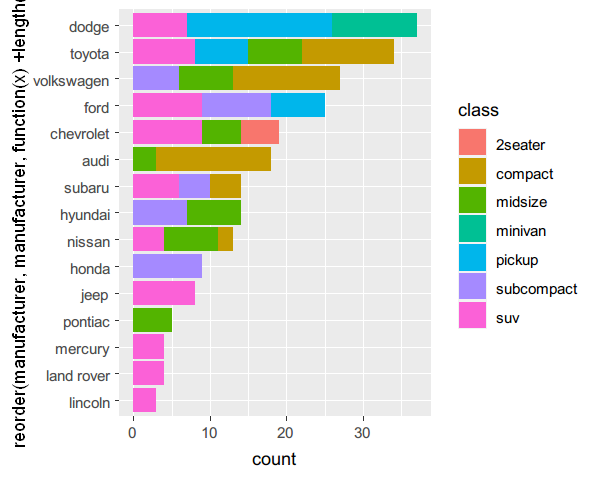

In [11]:
ggplot(mpg, aes(x = reorder(manufacturer, manufacturer,function(x)+length(x)),fill=class)) + geom_bar() + coord_flip()

주석을 추가하는 예제를 살펴보기 위해 실업률에 대한 그래프를 그려본다.

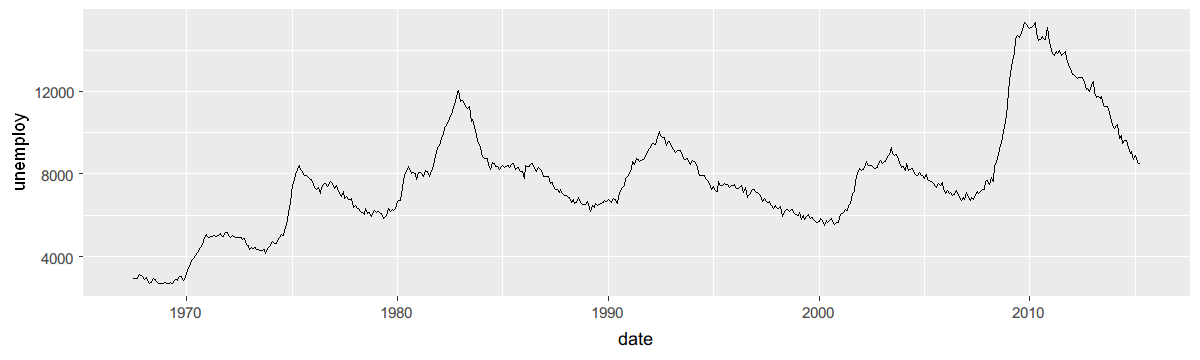

In [15]:
options(repr.plot.width=10, repr.plot.height=3)
ggplot(data=economics, aes(x=date,y=unemploy)) + geom_line()

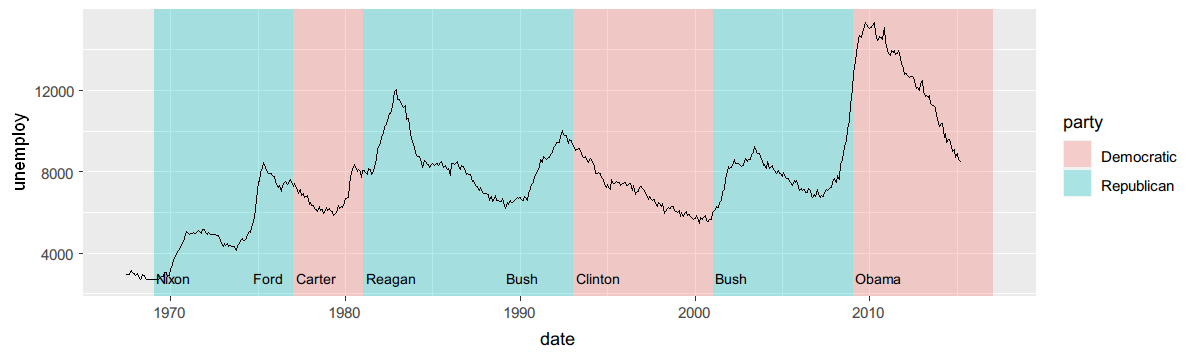

In [18]:
options(repr.plot.width=10, repr.plot.height=3)
presidential <- subset(presidential, start > economics$date[1])
ggplot(data=economics) + geom_rect(aes(xmin=start, xmax=end, fill=party), ymin= -Inf, ymax=Inf, alpha=0.3, data=presidential) +
    geom_line(aes(x=date, y=unemploy)) + geom_text(aes(x=start, y=2500, label= name), data=presidential, size=3, vjust=0, hjust=0, nudge_x= 50)

다수의 그룹에 대한 시각화

스파게티 플롯이라는 거을 그려보자.

In [19]:
data(Oxboys, package="nlme")
head(Oxboys)

,Subject,age,height,Occasion
,<ord>,<dbl>,<dbl>,<ord>
1,1,-1.0000,140.5,1
2,1,-0.7479,143.4,2
3,1,-0.4630,144.8,3
4,1,-0.1643,147.1,4
5,1,-0.0027,147.7,5
6,1,0.2466,150.2,6


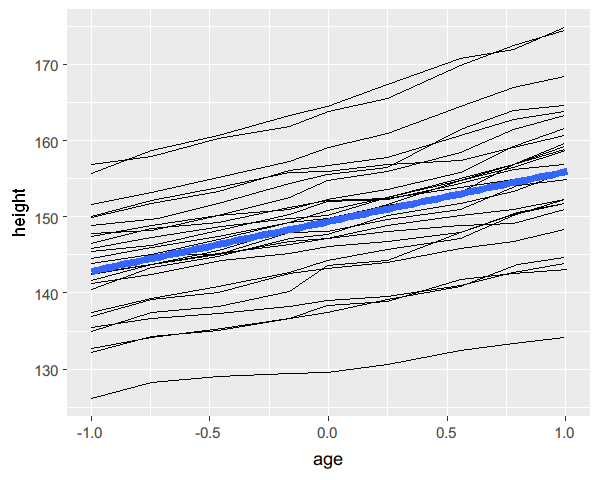

In [23]:
options(repr.plot.width=5, repr.plot.height=4)
ggplot(data=Oxboys, aes(x=age, y=height))+ 
    geom_line(aes(group=Subject)) + geom_smooth(method = 'lm', formula = y ~ x, size= 2, se= FALSE)